# Defining the problem statement
Exploratory Data Analysis

Training the model

Fine tuning the model

Save the model

# Defining the problem statement
The data contains anonymous information such as age, occupation, education, working class, etc. 
The goal is to train a binary classifier to predict the income which has two possible values ‘>50K’ and ‘<50K’. 
There are 48842 instances and 14 attributes in the dataset.
The data contains a good blend of categorical, numerical and missing values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
#test dataset
df_test = pd.read_csv('adult.test')
df_test.head()

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


# Descriptive Statistics


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observations
There are 32561 samples in the training dataset
There are both categorical and numerical columns in the dataset

In [4]:
df.shape


(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Test dataset

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16281 entries, (25,  Private, 226802,  11th, 7,  Never-married,  Machine-op-inspct,  Own-child,  Black,  Male, 0, 0, 40,  United-States) to (35,  Self-emp-inc, 182148,  Bachelors, 13,  Married-civ-spouse,  Exec-managerial,  Husband,  White,  Male, 0, 0, 60,  United-States)
Data columns (total 1 columns):
|1x3 Cross validator    16281 non-null object
dtypes: object(1)
memory usage: 469.5+ KB


In [10]:
df_test.describe()

,|1x3 Cross validator
count,16281
unique,2
top,<=50K.
freq,12435


In [9]:
df_test.shape

(16281, 1)

test data 6281 samples There are no missing values

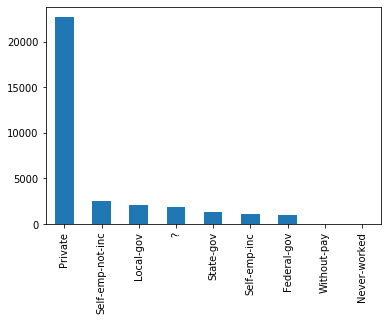

In [11]:
df.workclass.value_counts().plot(kind = 'bar')

In [12]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [14]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [15]:
df["marital.status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [16]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [18]:
def fun_view():
    ''' This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.'''
    null_values = df.apply(lambda x:x.isnull().sum())
    blank_char = df.apply(lambda x:x.isin(['?']).sum())
    percent_blank_char = df.apply(lambda x:round((x.isin(['?']).sum()/df.shape[0])*100, 2))
    unique_values = df.apply(lambda x:len(x.unique()))
    return pd.DataFrame({'null_values':null_values,
                         '? Values':blank_char,'% ? Values':percent_blank_char
                        ,'unique_values':unique_values})

In [19]:
%%time
print('Function Information',fun_view.__doc__)
view = fun_view()
display(view)

Function Information  This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.


,null_values,? Values,% ? Values,unique_values
age,0,0,0.00,73
workclass,0,1836,5.64,9
fnlwgt,0,0,0.00,21648
education,0,0,0.00,16
education.num,0,0,0.00,16
marital.status,0,0,0.00,7
occupation,0,1843,5.66,15
relationship,0,0,0.00,6
race,0,0,0.00,5
sex,0,0,0.00,2


Wall time: 224 ms


In [20]:
# Overall null values in the dataset. 
view[view['% ? Values'] != 0]

,null_values,? Values,% ? Values,unique_values
workclass,0,1836,5.64,9
occupation,0,1843,5.66,15
native.country,0,583,1.79,42



The columns workClass, occupation, native-country have missing values

# Numerical and categorical data:

# numeric (ways of finding numeric )

df._get_numeric_data()------------

df.select_dtypes(include=[np.number])----------

df.select_dtypes(include=np.number).columns.tolist()-----------------------you want the names of numeric columns:

df.select_dtypes(exclude=['object'])----------------------------------

numeric_clmns = df.dtypes[df.dtypes != "object"].index---------------------

df.select_dtypes('number').columns---------------------------

In [21]:
numeric=df.select_dtypes(include=[np.number]) #numeric 

In [22]:
print(numeric.columns)

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [23]:
numeric.isnull().sum()

age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

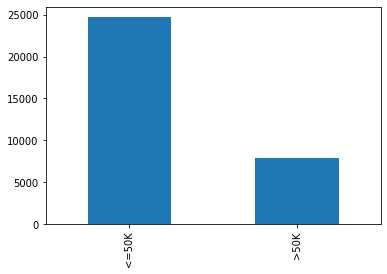

In [24]:
df.income.value_counts().plot(kind='bar') #target variable

In [25]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [26]:
categorical = df.select_dtypes(include=['object'])
print(categorical.columns)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [27]:
categorical.isnull().sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

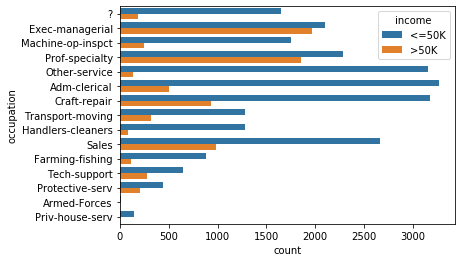

In [28]:
sns.countplot(y='occupation', hue='income', data=df,)

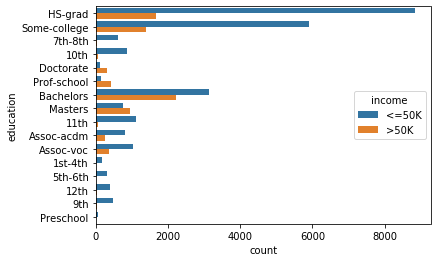

In [29]:
sns.countplot(y='education', hue='income', data=df,)

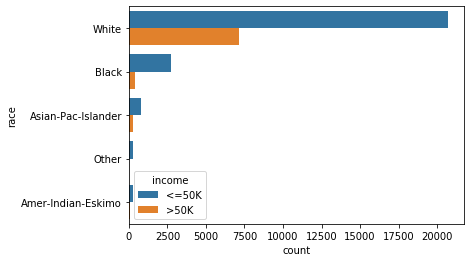

In [30]:
sns.countplot(y='race', hue='income', data=df,)

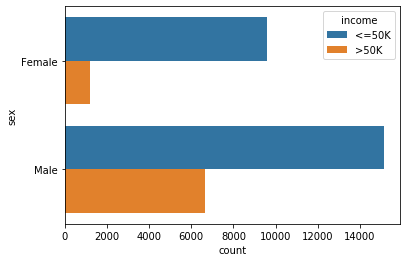

In [31]:
sns.countplot(y='sex', hue='income', data=df,)

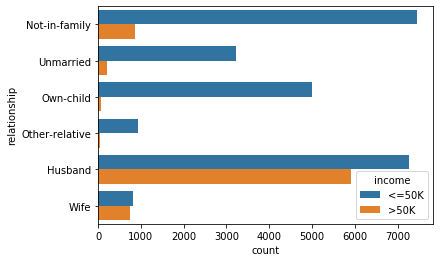

In [32]:
sns.countplot(y='relationship', hue='income', data=df,)

In [33]:
#checking duplicates

df.duplicated().sum()

24

In [34]:
df= df.drop_duplicates(keep = 'first')
df.shape

(32537, 15)

In [35]:
df1=df.copy()

In [36]:
# Quick known cleanup for this dataset
df['workclass']=df['workclass'].replace('?','Unknown') # Treat ? workclass as unknown
df = df[df['occupation'] != '?'] # Remove rows with occupation =?# Dropping occupation is '?' 
df['native.country']=df['native.country'].replace('?', df['native.country'].mode()[0]) # Replace ? with mode
df['fnlwgt']=np.log(df['fnlwgt']) # Convert to antural log
df.loc[df['native.country']!='United-States','native.country'] = 'non_usa'
# Two many category level, convert just US and Non-US

In [37]:
df['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [38]:
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: workclass, dtype: int64

In [39]:
print ("The maximum age is", df['age'].max())
print ("The minimum age is", df['age'].min())

The maximum age is 90
The minimum age is 17


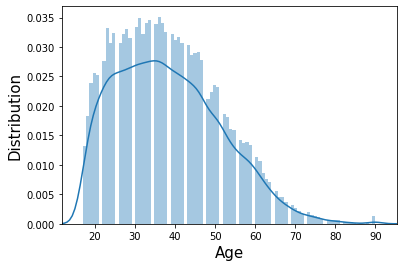

In [40]:
sns.distplot(df['age'], bins = 90)
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)


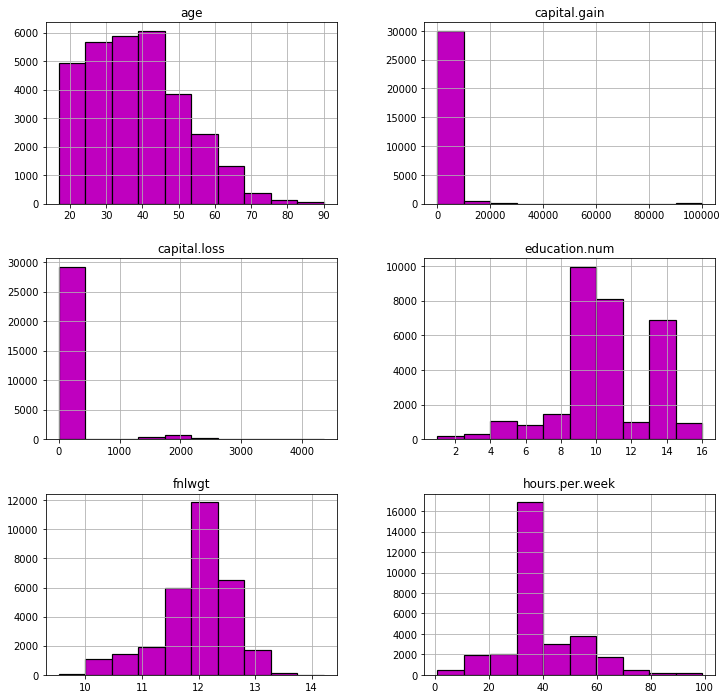

In [41]:
# Distribution of Different Features of the Dataset
dist = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'm')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# checking correlation

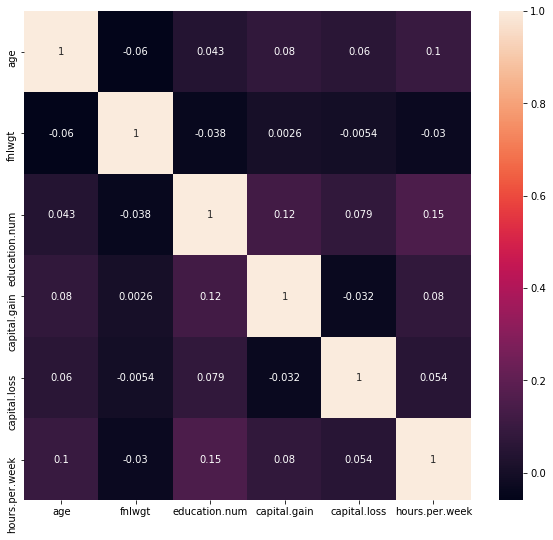

In [42]:
plt.rcParams['figure.figsize'] = [10,9]
sns.heatmap(df.corr(), annot = True);

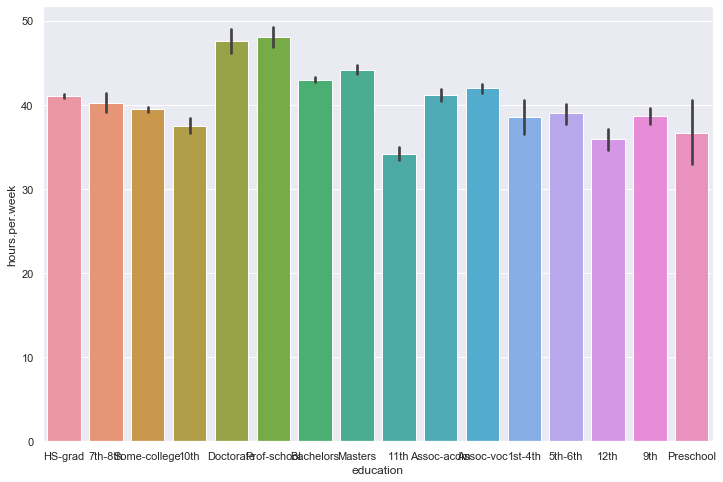

In [43]:
#hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
a = sns.barplot(x = df['education'], y = df['hours.per.week'], data = df)

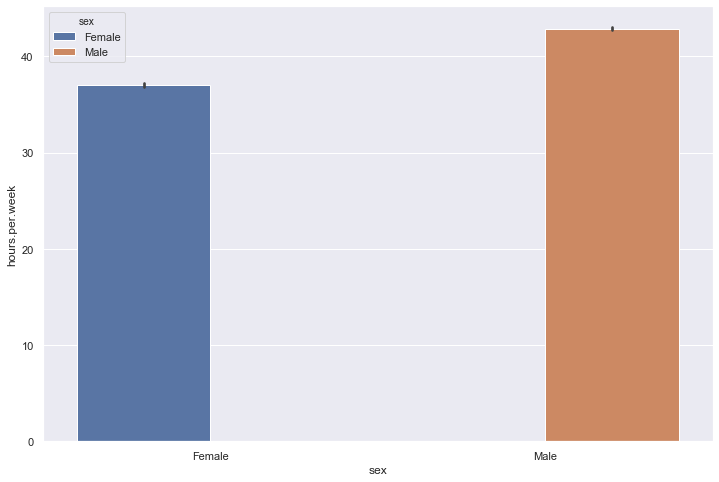

In [44]:
a = sns.barplot(x = df['sex'], y = df['hours.per.week'], data = df,hue = 'sex')

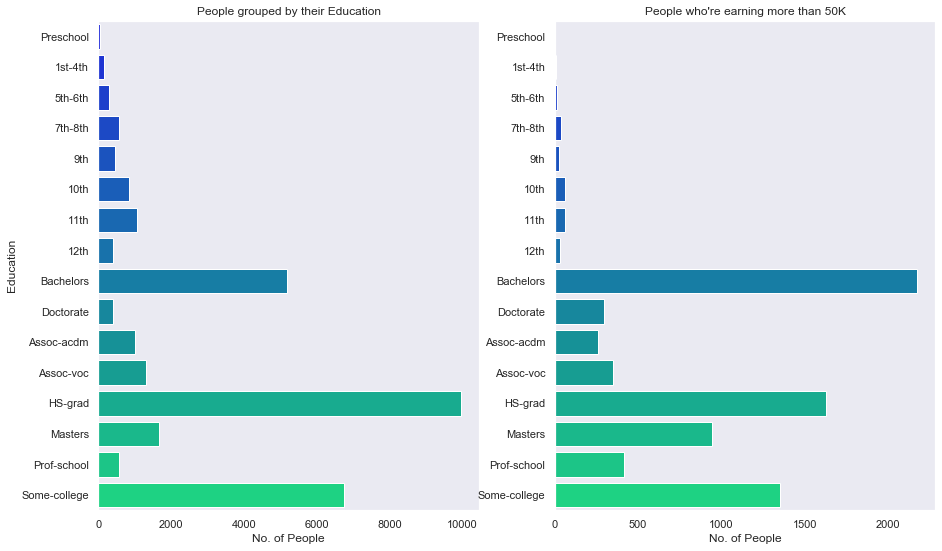

In [43]:
# Grouping people by their education
education_size = df.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = df.loc[df['income'] == '>50K', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])

#plt.setp(sns_ed_1.get_xticklabels(), rotation = 90);
#plt.setp(sns_ed_2.get_xticklabels(), rotation = 90);

In [44]:
df.occupation.unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [83]:
# Grouping people according to their country and their income
df = df[df['native.country'] != '?']
native_more = df.loc[df['income'] == '>50K',['native.country']].groupby('native.country').size()
native_less = df.loc[df['income'] == '<=50K',['native.country']].groupby('native.country').size()

index_more = list(native_more.index)
index_less = list(native_less.index)

# Checking if the Countries in both aspects are same or not
print(index_more)
print(len(index_more))
print(index_less)
print(len(index_less))

['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
39
['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia']
41


In [84]:
# Checking which Countries are not in the list
[country for country in index_less if country not in index_more]

['Holand-Netherlands', 'Outlying-US(Guam-USVI-etc)']

In [85]:
# Making DataFrames of the Data
df_more = pd.DataFrame({'Countries' : index_more, '>50K' : list(native_more) })
df_less = pd.DataFrame({'Countries' : index_less, '<=50K' : list(native_less) })

# Adding the entries of the missing countries
df_more.loc[40] = 'Holand-Netherlands', 0
df_more.loc[41] = 'Outlying-US(Guam-USVI-etc)', 0

df_more

,Countries,>50K
0,Cambodia,7
1,Canada,36
2,China,20
3,Columbia,2
4,Cuba,25
5,Dominican-Republic,2
6,Ecuador,4
7,El-Salvador,9
8,England,30
9,France,12


In [86]:
# Merging both the Data Frames to be used for plotting
df_fin = pd.merge(df_less, df_more, on = 'Countries')

df_fin

,Countries,<=50K,>50K
0,Cambodia,11,7
1,Canada,71,36
2,China,48,20
3,Columbia,54,2
4,Cuba,67,25
5,Dominican-Republic,65,2
6,Ecuador,23,4
7,El-Salvador,91,9
8,England,56,30
9,France,15,12


In [45]:
df1=df.copy()

In [46]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,11.797126,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,11.851959,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,12.486213,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,12.287026,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,11.922389,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [92]:
#Changing the income column into Numerical Value
df1['income'] = df1['income'].map({'<=50K':0, '>50K':1})

In [93]:
df1['income'].value_counts()

0    22633
1     7506
Name: income, dtype: int64

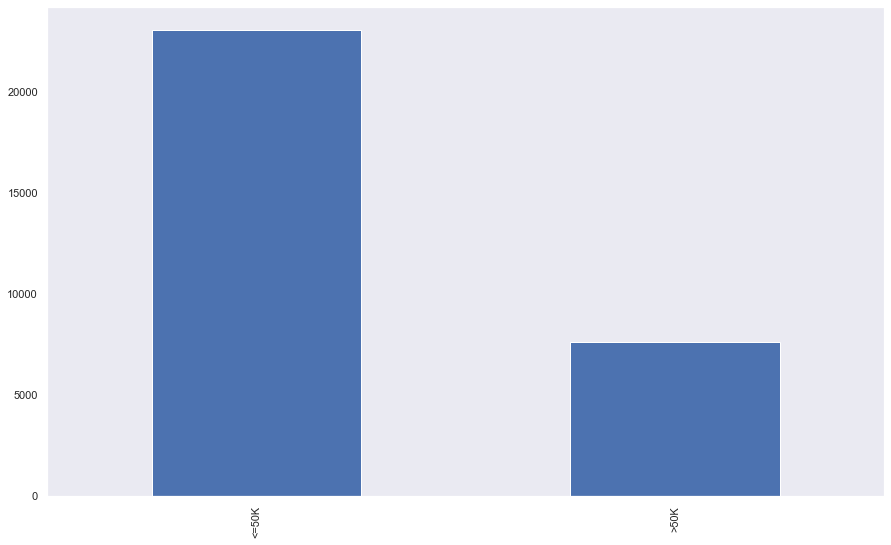

In [46]:
df.income.value_counts().plot(kind='bar')

# #Changing the Categorical Values to Numerical values using the Label Encoder

In [48]:
categorical.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [49]:
# We will use Label encoder for all categorical variables
from sklearn import preprocessing
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
categorical = categorical.apply(le.fit_transform)
categorical.head()

# concat df_categorical with original df
df = df.drop(categorical.columns, axis=1)
df = pd.concat([df,categorical], axis=1)

In [50]:
df2=df.copy()

# Scale the numerical features using StandardScalar

In [53]:
# Scale the numerical features using StandardScalar
from sklearn.preprocessing import StandardScaler
numeric= ['age','fnlwgt','education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
scaler = StandardScaler()

df[numeric] = scaler.fit_transform(
df[numeric])

In [59]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,3.320822,-0.298484,-0.441801,-0.147575,10.515042,-1.915256,4,11,6,4,1,4,0,39,0
3,1.185853,-0.211314,-2.393982,-0.147575,9.391340,-0.079501,4,5,0,7,4,4,0,39,0
4,0.194617,0.797002,-0.051364,-0.147575,9.391340,-0.079501,4,15,5,10,3,4,0,39,0
5,-0.339126,0.480342,-0.441801,-0.147575,9.070986,0.337716,4,11,0,8,4,4,0,39,0
6,-0.034130,-0.099346,-1.613109,-0.147575,9.070986,-0.079501,4,0,5,1,4,4,1,39,0


In [57]:
df.isna().sum() 
#check nan values

age               1867
fnlwgt            1867
education.num     1867
capital.gain      1867
capital.loss      1867
hours.per.week    1867
workclass            0
education            0
marital.status       0
occupation           0
relationship         0
race                 0
sex                  0
native.country       0
income               0
dtype: int64

In [58]:
df.dropna(inplace=True)
#drop nan values

In [60]:
df2=df.copy()

# Splitting the data set into train and test set

In [61]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['income', 'education.num'])
y= df['income']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state = 0)



In [62]:
print ("Train data set size : ", x_train.shape)
print ("Test data set size : ", x_test.shape)

Train data set size :  (21485, 13)
Test data set size :  (9209, 13)


# Feature importance:

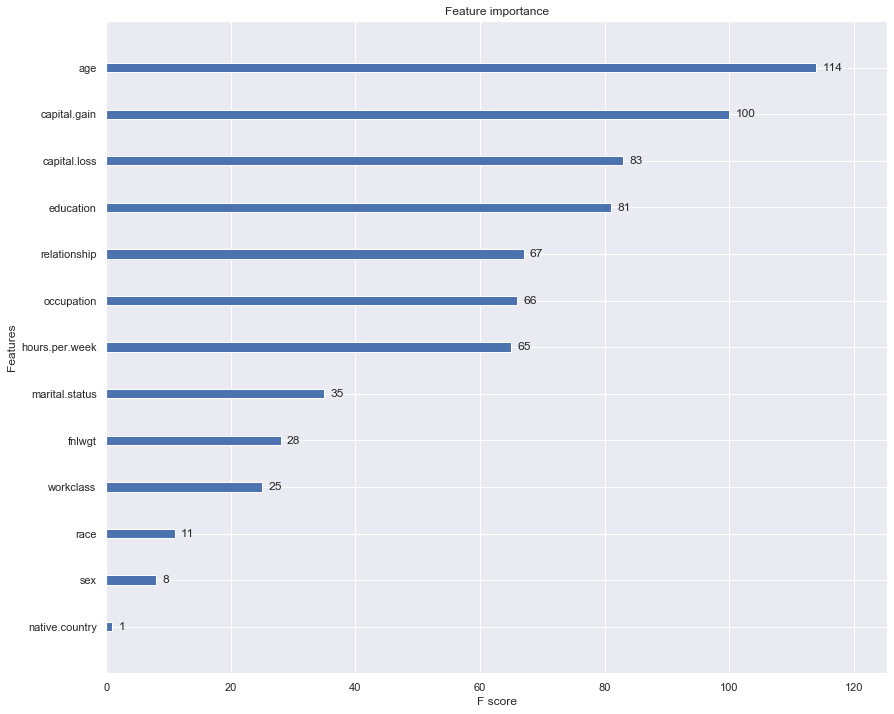

In [63]:

from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(x_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

# select k best

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings; warnings.simplefilter('ignore')

# Logistic 

In [68]:
log = LogisticRegression(C = 0.5, max_iter = 500)
log_model = log.fit(x_train, y_train)

# Predict
pred_1 = log_model.predict(x_test)

print ("The accuracy of log_model: ",accuracy_score(y_test, pred_1))
print ("The f1 score of log_model: ", f1_score(y_test, pred_1, average = 'binary'))

The accuracy of log_model:  0.8001954609621023
The f1 score of log_model:  0.4487717195925704


# Random Forest

In [69]:
rf = RandomForestClassifier(n_estimators = 200)
rf_model = rf.fit(x_train, y_train)

# Predict
pred_2 = rf_model.predict(x_test)

print ("The accuracy of rf_model : ",accuracy_score(y_test, pred_2))
print ("The f1 score of rf_model: ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of rf_model :  0.8554674774676947
The f1 score of rf_model:  0.6796630565583635


In [70]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,matthews_corrcoef,roc_auc_score

In [72]:
def fun_model(models,x_train, x_test, y_train, y_test):
    col = []; train_score = []; acc = []; kappa=[]; roc = []; prc=[];rec=[];f1=[]
    for i, j in models:
        pred = j.fit(x_train,y_train).predict(x_test)
        col.append(i)
        train_score.append(j.score(x_train,y_train))
        acc.append(accuracy_score(y_test,pred))
        prc.append(precision_score(y_test,pred))
        rec.append(recall_score(y_test,pred))
        f1.append(f1_score(y_test,pred))
        kappa.append(cohen_kappa_score(y_test,pred))
        roc.append(roc_auc_score(y_test,pred))

    return pd.DataFrame({'Model Name':col,
                  'Accuracy on Train set ':train_score,
                  'Accuracy on Test set ':acc,
                         'f1_score':f1,
                    'Cohen Kappa Score':kappa
                    ,})

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.7,random_state=1)
models = [] 
models.append(('Logistic Regression', LogisticRegression(random_state=1)))  
models.append(('Logistic Regression Balanced', LogisticRegression(random_state=1,class_weight='balanced')))
fun_model(models,x_train, x_test, y_train, y_test)

,Model Name,Accuracy on Train set,Accuracy on Test set,f1_score,Cohen Kappa Score
0,Logistic Regression,0.795578,0.798458,0.453796,0.351376
1,Logistic Regression Balanced,0.726600,0.728092,0.583361,0.395718


# balancing target variable

Wall time: 1.59 s


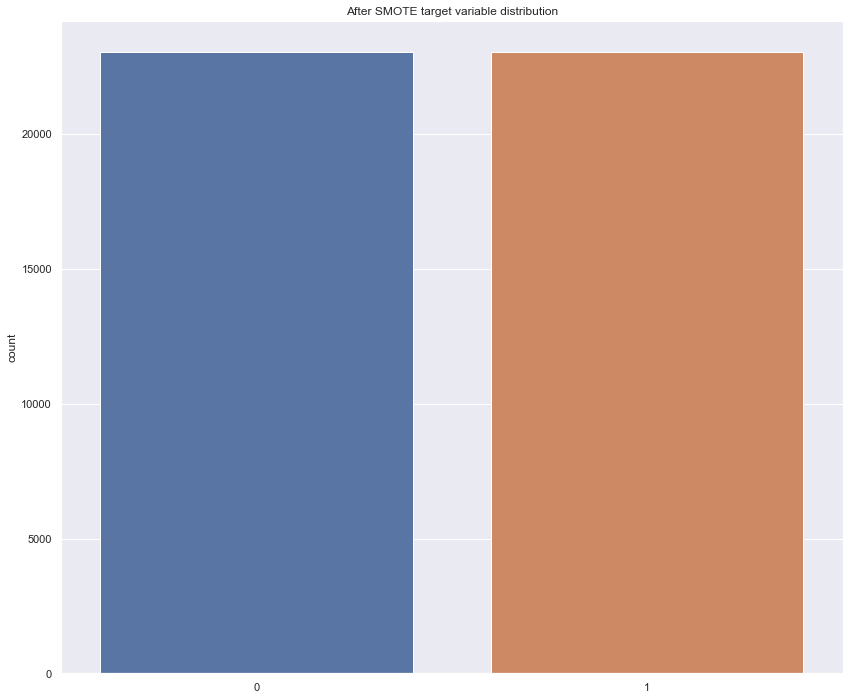

In [74]:
%%time
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)
X_res = pd.DataFrame(X_res,columns=x.columns)
sns.countplot(y_res).set_title('After SMOTE target variable distribution')
plt.savefig('After SMOTE target variable distribution.png')
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_res,y_res,train_size=.7,random_state=1)

# RandomForest

In [75]:
rf = RandomForestClassifier(n_estimators = 200)
rf_model1 = rf.fit(x_train1, y_train1)

# Predict
pred_smote = rf_model.predict(x_test1)

print ("The accuracy of rf_model : ",accuracy_score(y_test1, pred_smote))
print ("The f1 score of rf_model: ", f1_score(y_test1, pred_smote, average = 'binary'))

The accuracy of rf_model :  0.887402371998843
The f1 score of rf_model:  0.8756687694641858


In [77]:
print(classification_report(y_test1, pred_smote))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      6922
           1       0.98      0.79      0.88      6906

    accuracy                           0.89     13828
   macro avg       0.90      0.89      0.89     13828
weighted avg       0.90      0.89      0.89     13828



# xgboost

In [78]:
from xgboost.sklearn import XGBClassifier

In [80]:
xgb= XGBClassifier()
xg_model =xgb.fit(x_train1, y_train1)

# Predict
pred_xgb = xg_model.predict(x_test1)

print ("The accuracy of xgb_model : ",accuracy_score(y_test1, pred_xgb))
print ("The f1 score of xgb_model: ", f1_score(y_test1, pred_xgb, average = 'binary'))

The accuracy of xgb_model :  0.8583309227654036
The f1 score of xgb_model:  0.8625938135652662


In [81]:
print(classification_report(y_test1, pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      6922
           1       0.84      0.89      0.86      6906

    accuracy                           0.86     13828
   macro avg       0.86      0.86      0.86     13828
weighted avg       0.86      0.86      0.86     13828



# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model =dt.fit(x_train1, y_train1)

# Predict
pred_dt = dt_model.predict(x_test1)

print ("The accuracy of dt_model : ",accuracy_score(y_test1, pred_dt))
print ("The f1 score of dt_model: ", f1_score(y_test1, pred_dt, average = 'binary'))

The accuracy of dt_model :  0.8397454440266127
The f1 score of dt_model:  0.8400000000000001


In [84]:
print(classification_report(y_test1, pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      6922
           1       0.84      0.84      0.84      6906

    accuracy                           0.84     13828
   macro avg       0.84      0.84      0.84     13828
weighted avg       0.84      0.84      0.84     13828



# adaboost

In [85]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
pred_adab=adab.fit(x_train1, y_train1).predict(x_test1)

In [86]:
print ("The accuracy of ada_model : ",accuracy_score(y_test1, pred_adab))
print ("The f1 score of ada_model: ", f1_score(y_test1, pred_adab, average = 'binary'))

The accuracy of ada_model :  0.8471217818918138
The f1 score of ada_model:  0.850113442994895


# GridSearchCV and hyperparameter tunning

In [88]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [89]:
%%time
rfc = RandomForestClassifier(random_state=1)
param = {'n_estimators': [10, 15], 'max_features': [5, 10], 
 'max_depth': [5,7,8, None], 'bootstrap': [True, False]}

clf = GridSearchCV(rfc,param,scoring='accuracy',refit=True,cv=10)
clf.fit(x_train1,y_train1)
print('Completed')
print(clf.best_params_)

Completed
{'bootstrap': False, 'max_depth': None, 'max_features': 5, 'n_estimators': 15}
Wall time: 7min 43s


In [90]:
rf2 = RandomForestClassifier(bootstrap=False, criterion='gini',
                       max_depth=None , max_features=5,
                       min_samples_leaf=1, min_samples_split=2,n_estimators=15)
rf_model2 = rf2.fit(x_train1, y_train1)

# Predict
pred_smote2 = rf_model2.predict(x_test1)

print ("The accuracy of rf_model : ",accuracy_score(y_test1, pred_smote2))
print ("The f1 score of rf_model: ", f1_score(y_test1, pred_smote2, average = 'binary'))

The accuracy of rf_model :  0.8876916401504195
The f1 score of rf_model:  0.888713722680043


In [92]:
from xgboost.sklearn import XGBClassifier
xgb2= XGBClassifier(base_score=0.5, booster='gbtree', 
              learning_rate=0.4, max_depth=3, n_estimators=100,objective='binary:logistic', random_state=0, seed=None)
xg_model2 =xgb2.fit(x_train1, y_train1)

# Predict
pred_xgb2 = xg_model2.predict(x_test1)

print ("The accuracy of xgb_model2 : ",accuracy_score(y_test1, pred_xgb2))
print ("The f1 score of xgb_model2: ", f1_score(y_test1, pred_xgb2, average = 'binary'))

The accuracy of xgb_model2 :  0.8911628579693376
The f1 score of xgb_model2:  0.8924308484025446
